In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from datasets_utils import get_luxury_data, get_tech_data, get_retail_data, get_big_basket_data
from preprocessing.utils import (
    remove_HTML,
    remove_punctuation,
    keep_alpha_numerical,
    remove_space,
    remove_stopwords,
    apply_lemmetization,
    is_sentence_in_boundaries,
    count_words,
    get_most_common_words,
    get_top_ngrams,
)

In [8]:
luxury_data = get_luxury_data()
tech_data = get_tech_data()
retail_data = get_retail_data()
big_basket_data = get_big_basket_data()

luxury_data.shape, tech_data.shape, retail_data.shape, big_basket_data.shape

((4963, 2), (23768, 2), (21634, 2), (27440, 2))

In [9]:
def preprocess(sentence):
    result = remove_HTML(sentence)
    result = remove_punctuation(result)
    result = keep_alpha_numerical(result)
    result = remove_space(result)
    result = result.lower()
    result = remove_stopwords(result)
    result = apply_lemmetization(result)
    return result

tech_data['description'] = tech_data['description'].apply(preprocess)
luxury_data['description'] = luxury_data['description'].apply(preprocess)
retail_data['description'] = retail_data['description'].apply(preprocess)
big_basket_data['description'] = big_basket_data['description'].apply(preprocess)

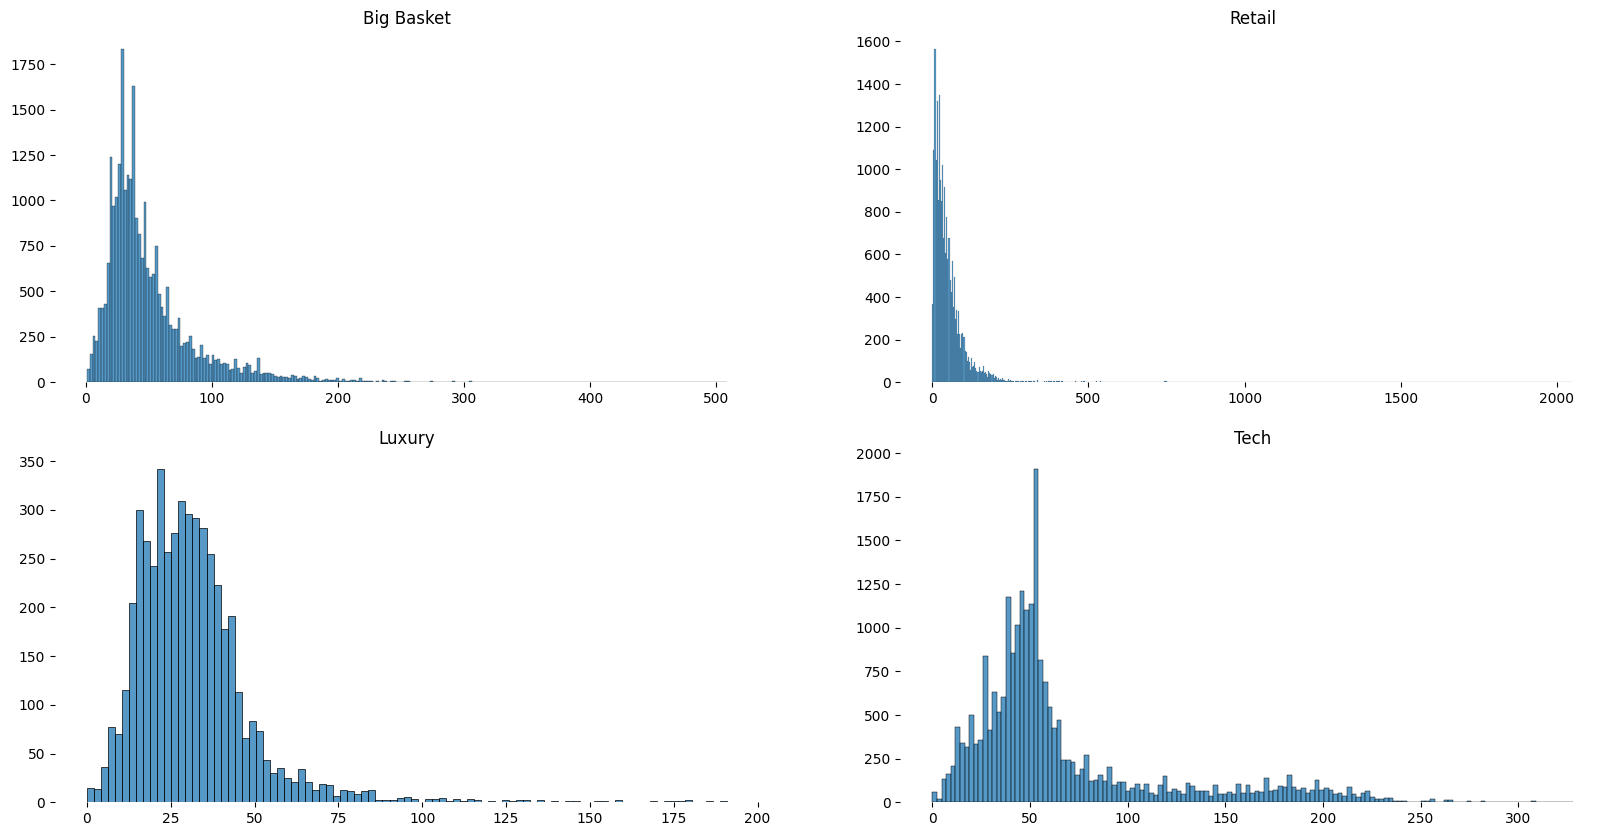

In [10]:
def plot_num_of_tokens_per_description(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        ax = sns.histplot(data[i]["description"].apply(count_words), ax=axs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_num_of_tokens_per_description(
    data=[big_basket_data, retail_data, luxury_data, tech_data],
    names=["Big Basket", "Retail", "Luxury", "Tech"]
)

In [11]:
big_basket_data = big_basket_data[big_basket_data['description'].apply(lambda x: is_sentence_in_boundaries(x, max_tokens=200))]
retail_data = retail_data[retail_data['description'].apply(lambda x: is_sentence_in_boundaries(x, max_tokens=250))]
luxury_data = luxury_data[luxury_data['description'].apply(lambda x: is_sentence_in_boundaries(x, max_tokens=100))]
tech_data = tech_data[tech_data['description'].apply(lambda x: is_sentence_in_boundaries(x, max_tokens=200))]

big_basket_data.shape, retail_data.shape, luxury_data.shape, tech_data.shape

((26438, 2), (18688, 2), (4737, 2), (22584, 2))

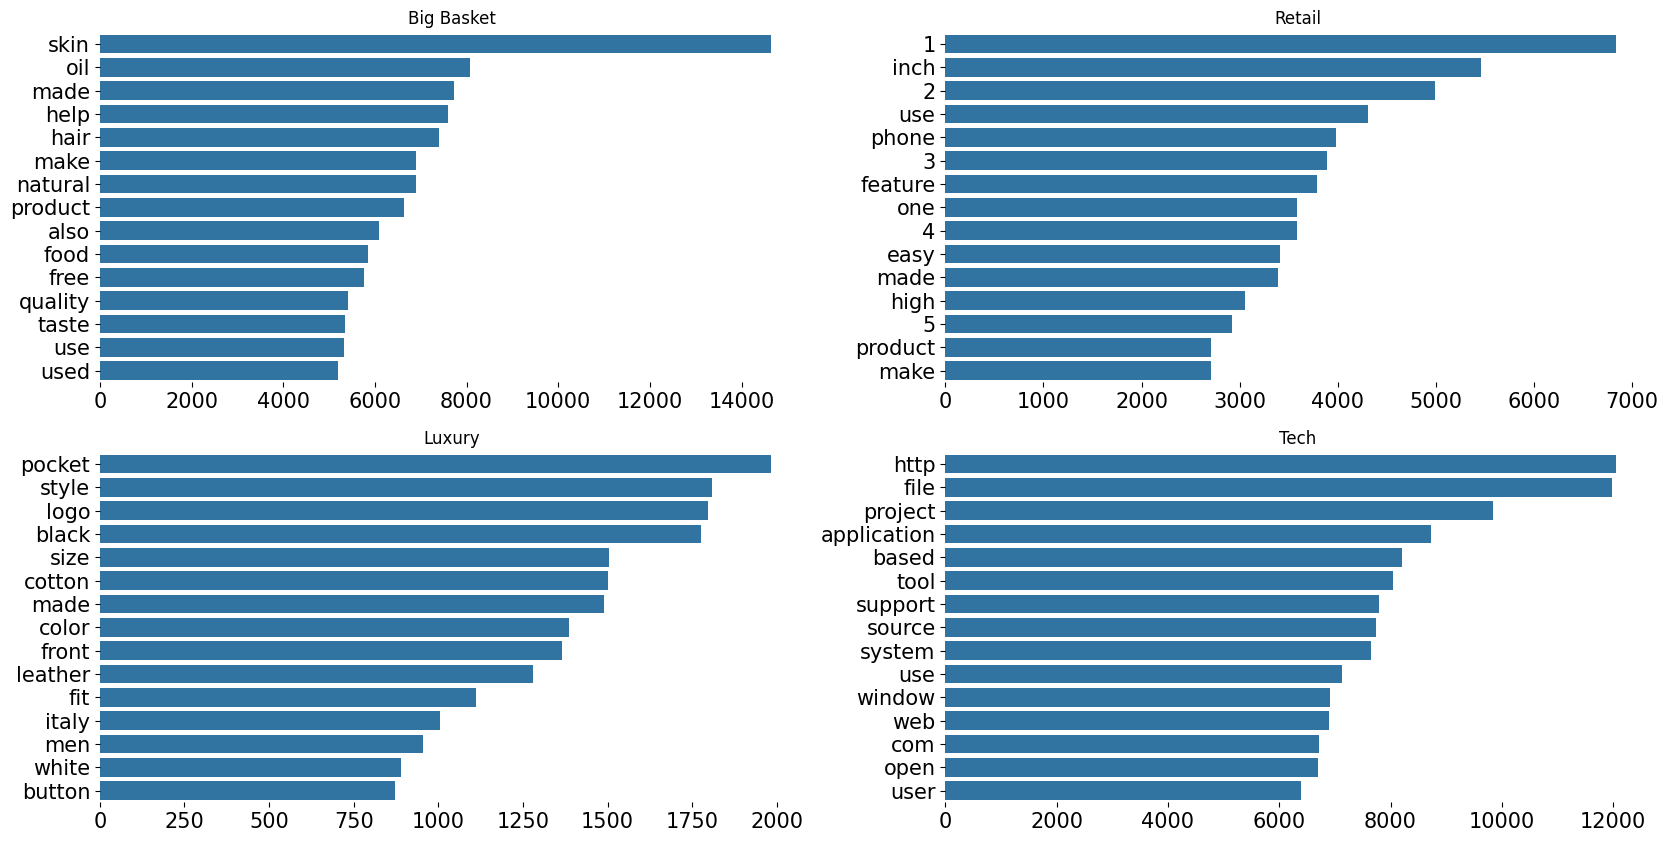

In [12]:
def plot_top_15_tokens(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        x, y = get_most_common_words(data[i], n=15)
        ax = sns.barplot(x=y, y=x, ax=axs[i])
        ax.tick_params(labelsize=15)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_title(names[i])
        ax.set_ylabel("")
        ax.set_xlabel("")
    plt.show()

plot_top_15_tokens(
    data=[big_basket_data, retail_data, luxury_data, tech_data],
    names=["Big Basket", "Retail", "Luxury", "Tech"]
)

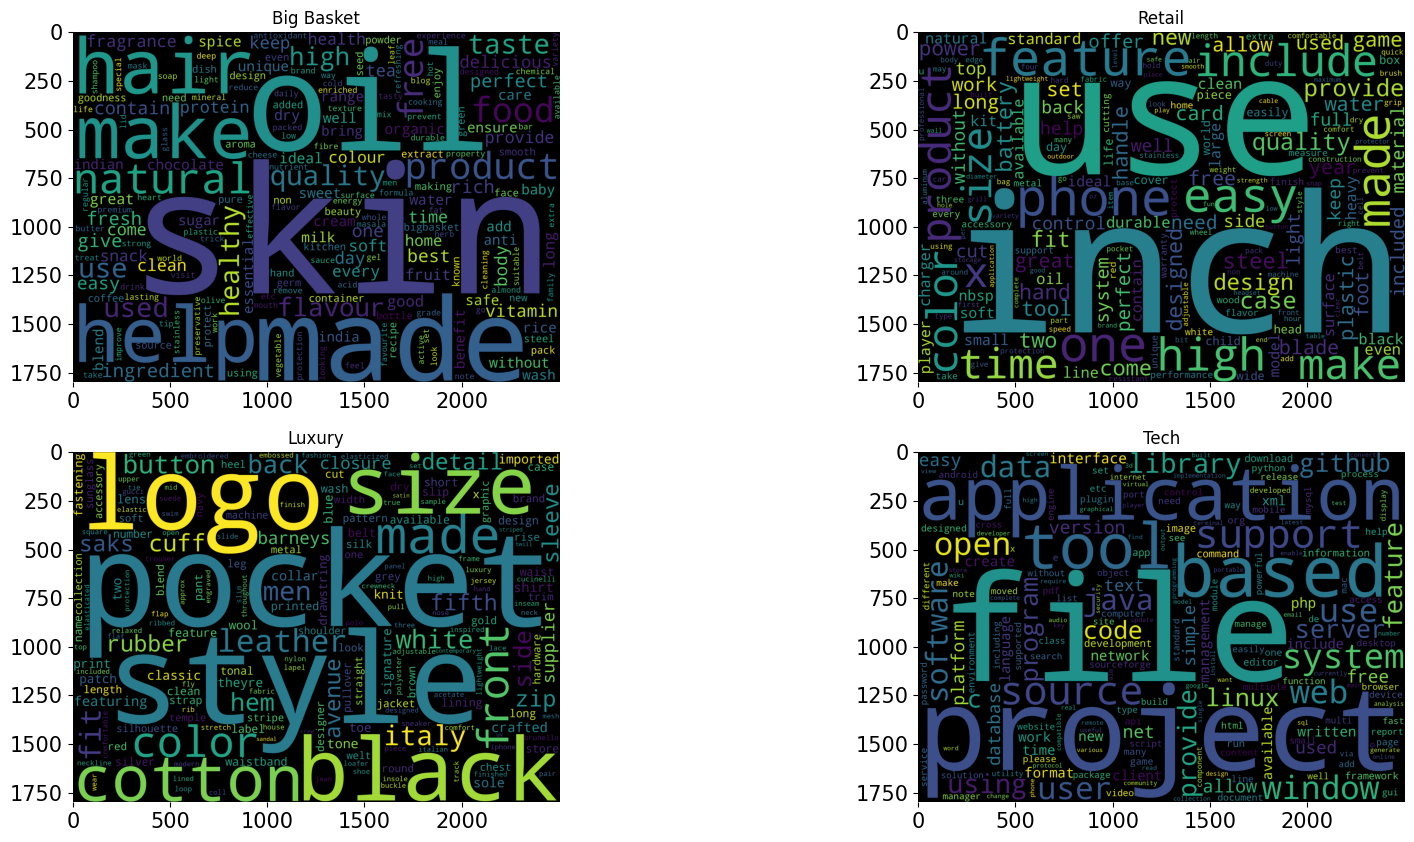

In [13]:
def plot_word_cloud(data, names, ncols=2, nrows=2):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 10))
    axs = [i for ax in axs for i in ax]
    for i in range(len(data)):
        cloud = WordCloud(
          background_color='black',
          collocations=False,
          width=2500,
          height=1800
         ).generate(' '.join(data[i]['description'].values))
        axs[i].imshow(cloud)
        axs[i].tick_params(labelsize=15)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_title(names[i])
        axs[i].set_ylabel("")
        axs[i].set_xlabel("")
    plt.show()

plot_word_cloud(
    data=[big_basket_data, retail_data, luxury_data, tech_data],
    names=["Big Basket", "Retail", "Luxury", "Tech"]
)

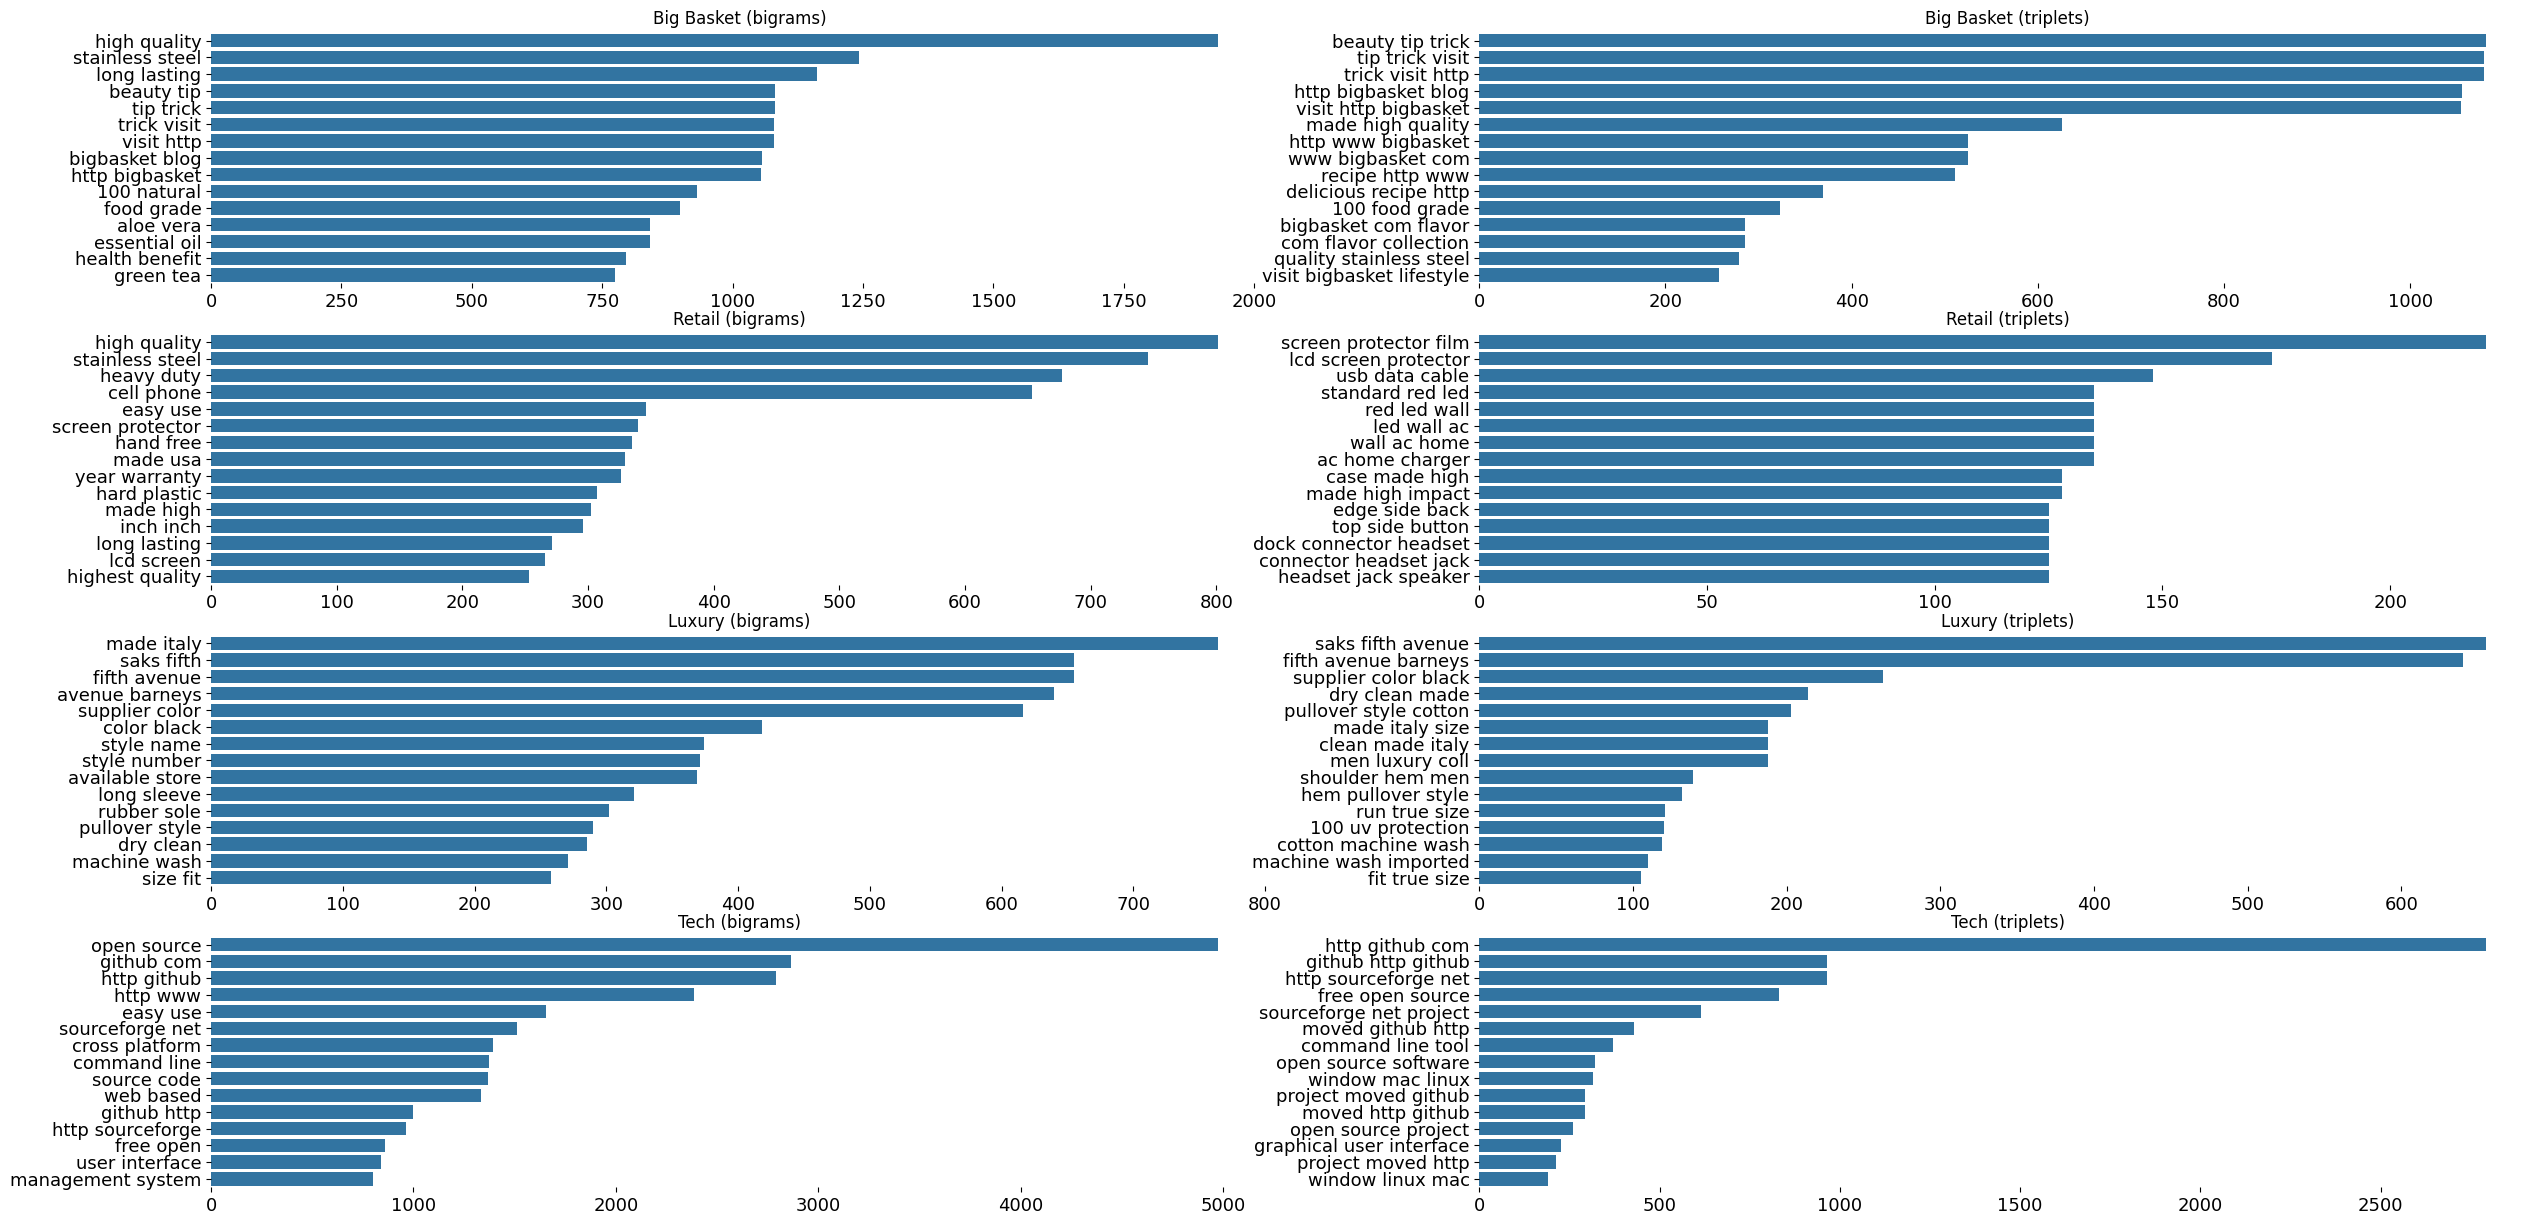

In [14]:
def plot_ngrams(data, names, ncols=2, nrows=4):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(30, 15))
    axs = [i for ax in axs for i in ax]

    i = 0

    for df, name in zip(data, names):
        bigrams = get_top_ngrams(df, n=2, k=15)
        triplets = get_top_ngrams(df, n=3, k=15)

        x, y = map(list,zip(*bigrams))
        ax_bigrams = sns.barplot(x=y,y=x, ax=axs[i])
        ax_bigrams.tick_params(labelsize=13)
        ax_bigrams.spines['top'].set_visible(False)
        ax_bigrams.spines['right'].set_visible(False)
        ax_bigrams.spines['bottom'].set_visible(False)
        ax_bigrams.spines['left'].set_visible(False)
        ax_bigrams.set_title(f"{name} (bigrams)")
        ax_bigrams.set_ylabel("")
        ax_bigrams.set_xlabel("")

        i += 1

        x, y = map(list,zip(*triplets))
        ax_triplets = sns.barplot(x=y,y=x, ax=axs[i])
        ax_triplets.tick_params(labelsize=13)
        ax_triplets.spines['top'].set_visible(False)
        ax_triplets.spines['right'].set_visible(False)
        ax_triplets.spines['bottom'].set_visible(False)
        ax_triplets.spines['left'].set_visible(False)
        ax_triplets.set_title(f"{name} (triplets)")
        ax_triplets.set_ylabel("")
        ax_triplets.set_xlabel("")

        i += 1

    plt.show()

plot_ngrams(
    data=[big_basket_data, retail_data, luxury_data, tech_data],
    names=["Big Basket", "Retail", "Luxury", "Tech"]
)